In [9]:
import pandas as pd
WOB_FILE = "WOB_1631999807.5345073.csv"
POWER_FILE = "power_meter_1631999807.578966.csv"
IMU_FILE = "AccelGyro_1631999807.599618.csv"
df1 = pd.read_csv("rig_1631996578.417178.csv")
min_time = 1632000300
#min_time = 1632000000
max_time = 1632000600

df_wob = pd.read_csv(WOB_FILE)
df_wob = df_wob[df_wob["time_s"] > 0]

df1 = df1[df1["time_s"] > min_time]
df1 = df1[df1["time_s"] < max_time]

df_wob = df_wob[df_wob["time_s"] > min_time]
df_wob = df_wob[df_wob["time_s"] < max_time]

df_power = pd.read_csv(POWER_FILE)
df_power = df_power[df_power["time_s"] > min_time]
df_power = df_power[df_power["time_s"] < max_time]

df_imu = pd.read_csv(IMU_FILE)
df_imu = df_imu[df_imu["time_s"] > min_time]
df_imu = df_imu[df_imu["time_s"] < max_time]
df1["pos_0_m"] = df1["pos_0_m"] + 0.01

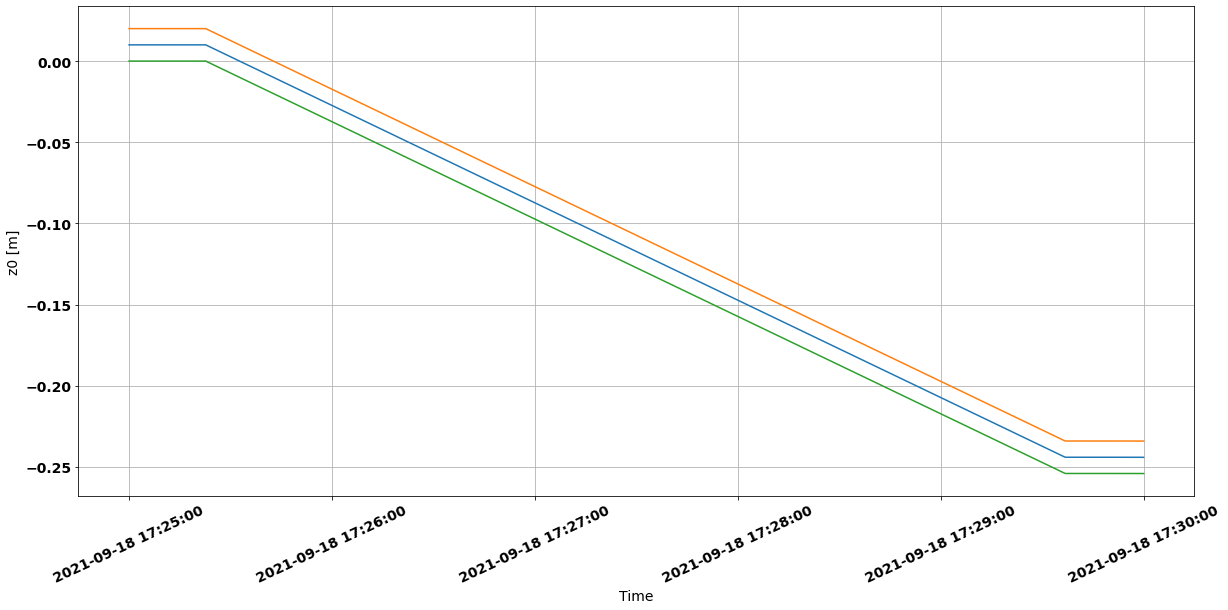

In [10]:
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as md
import matplotlib

%matplotlib inline

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)


plt.figure(figsize=[20, 10])
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
dates1=[dt.datetime.fromtimestamp(ts) for ts in df1["time_s"] ]
#dates2=[dt.datetime.fromtimestamp(ts) for ts in df2["time_s"] ]

plt.plot(dates1, df1["pos_0_m"])
plt.plot(dates1, df1["pos_0_m"] + 0.01)
plt.plot(dates1, df1["pos_0_m"] - 0.01)

#plt.plot(dates1, df1["pos_1_m"])
plt.xlabel("Time")
plt.ylabel("z0 [m]")
plt.grid('on')
#plt.ylim([-20, 10])

plt.show()

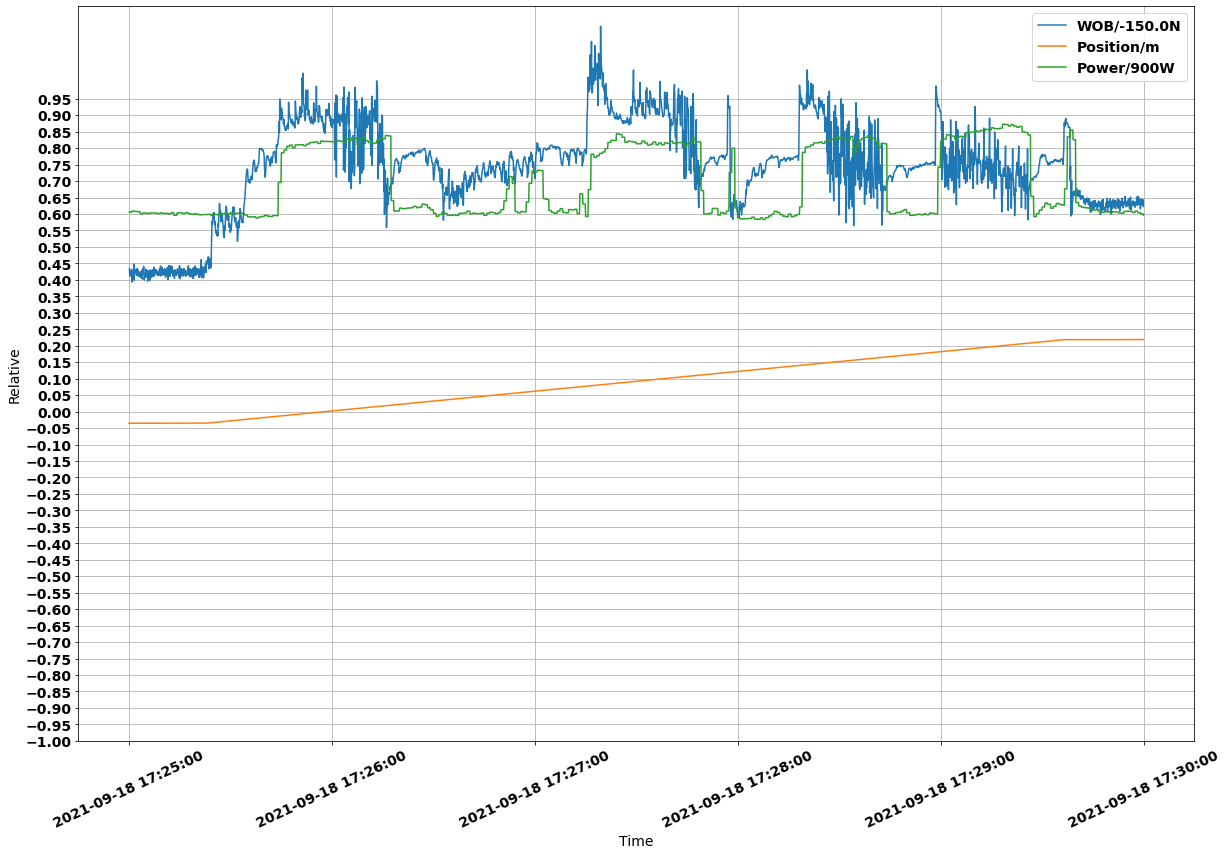

In [11]:
import numpy as np

plt.figure(figsize=[20, 15])
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
dates_wob=[dt.datetime.fromtimestamp(ts) for ts in df_wob["time_s"] ]
dates_power=[dt.datetime.fromtimestamp(ts) for ts in df_power["time_s"] ]
dates_imu = [dt.datetime.fromtimestamp(ts) for ts in df_imu["time_s"]]
plt.plot(dates_wob, df_wob["wob_n"]/-150.0, label='WOB/-150.0N')
#plt.plot(dates_wob, df_wob["wob_heater_n"]/150.0)
plt.plot(dates1, -df1["pos_0_m"] - 0.0254, label='Position/m')
#plt.plot(dates1, df1["torque_0_Percent"]/100 + 0.25)
plt.plot(dates_power, df_power["active_power_W"]/900, label='Power/900W')
#plt.plot(dates_imu, df_imu["Az_g"], label='IMU')

plt.xlabel("Time")
plt.ylabel("Relative")
plt.grid('on')
major_ticks = np.arange(-1, 1, 0.05)
ax.set_yticks(major_ticks)
#plt.ylim([0, 1.0])
plt.legend()

plt.show()

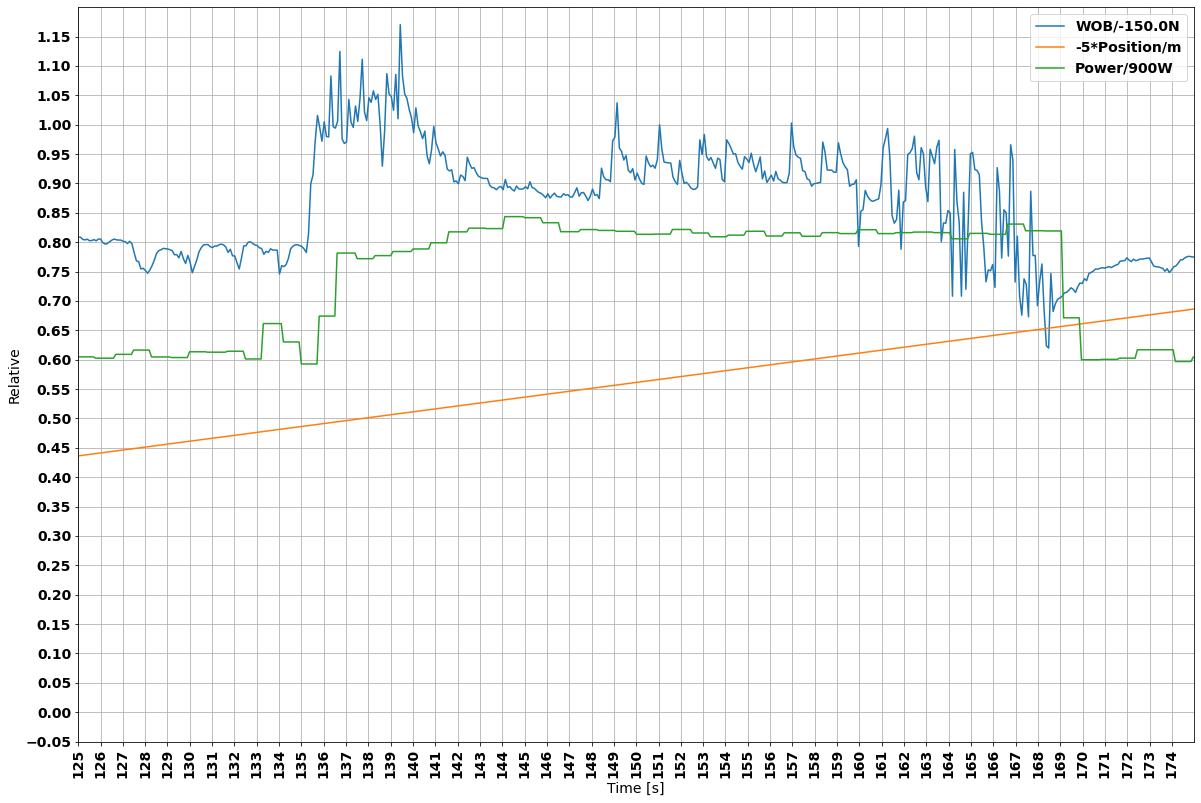

In [27]:
plt.figure(figsize=[20, 15])
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=90 )
ax=plt.gca()
plt.plot(df_wob['time_s']-min_time, df_wob["wob_n"]/-150.0, label='WOB/-150.0N')
plt.plot(df1['time_s']-min_time, -5*df1["pos_0_m"] - 0.0254, label='-5*Position/m')
plt.plot(df_power['time_s']-min_time, df_power["active_power_W"]/900, label='Power/900W')

plt.xlabel("Time [s]")
plt.ylabel("Relative")
plt.grid('on')
major_ticks = np.arange(-0.05, 1.2, 0.05)
ax.set_yticks(major_ticks)
ax.set_xticks(np.arange(125, 175, 1))
plt.ylim([-0.05, 1.2])
plt.xlim([125, 175])
plt.legend()

plt.show()

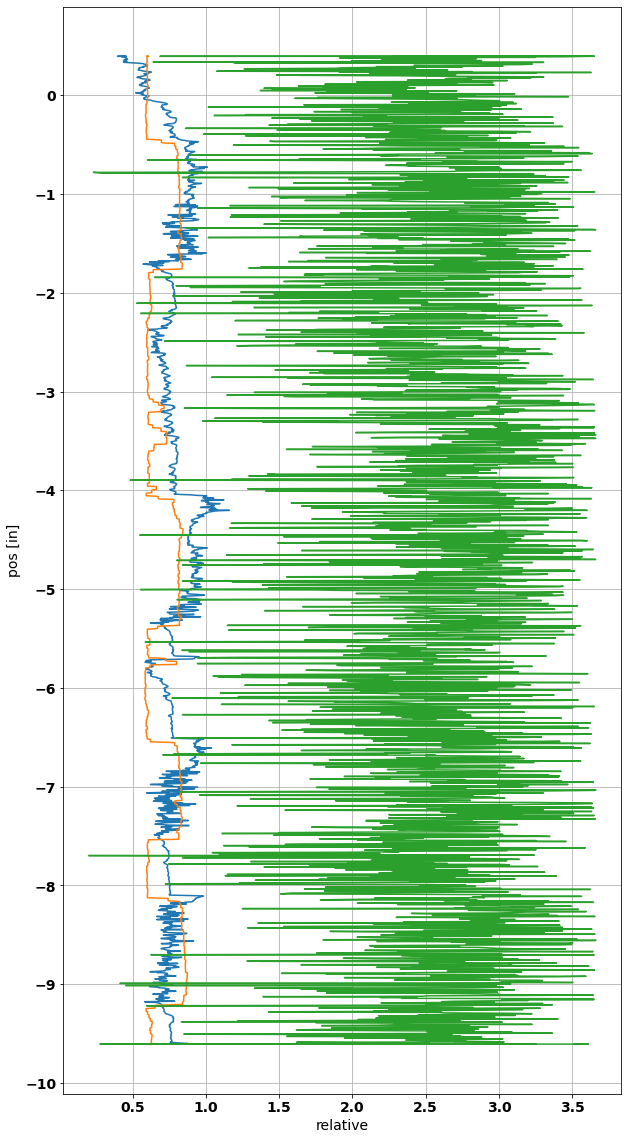

In [5]:
from scipy import interpolate
import numpy
df_wob = pd.read_csv(WOB_FILE)
df_power = pd.read_csv(POWER_FILE)
df_imu = pd.read_csv(IMU_FILE)


ts = df1["time_s"]
f_wob = interpolate.interp1d(df_wob["time_s"], df_wob["wob_n"])
wob_ts = f_wob(ts)

f_power = interpolate.interp1d(df_power["time_s"], df_power["active_power_W"])
power_ts = f_power(ts)

f_imu_x = interpolate.interp1d(df_imu["time_s"], df_imu["Ax_g"])
f_imu_y = interpolate.interp1d(df_imu["time_s"], df_imu["Ay_g"])
f_imu_z = interpolate.interp1d(df_imu["time_s"], df_imu["Az_g"])
a_ts = numpy.sqrt(
            f_imu_x(ts)*f_imu_x(ts) + \
            f_imu_y(ts)*f_imu_y(ts) + \
            f_imu_z(ts)*f_imu_z(ts) )

plt.figure(figsize=[10, 20])

plt.plot(wob_ts/-150.0, df1["pos_0_m"]*100/2.54)
plt.plot(power_ts/900.0, df1["pos_0_m"]*100/2.54)
plt.plot(a_ts, df1["pos_0_m"]*100/2.54)
plt.ylabel("pos [in]")
plt.xlabel("relative")

plt.grid('on')
ax=plt.gca()
major_ticks = np.arange(-10, 1, 1)
ax.set_yticks(major_ticks)
plt.show()


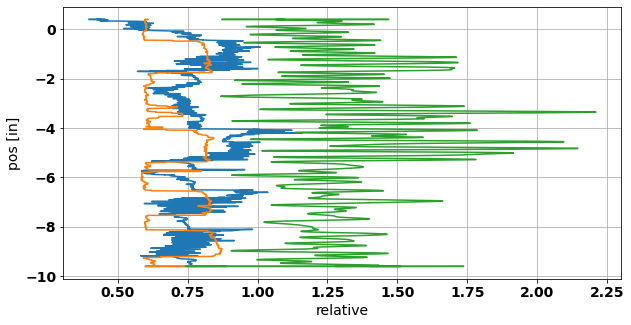

In [6]:
from scipy import signal
b, a = b, a = signal.butter(16, 0.125/2.0)
a_filtered = signal.filtfilt(b, a, a_ts, padlen=150)

plt.figure(figsize=[10, 5])

plt.plot(wob_ts/-150.0, df1["pos_0_m"]*100/2.54)
plt.plot(power_ts/900.0, df1["pos_0_m"]*100/2.54)
plt.plot(a_filtered/6, df1["pos_0_m"]*100/2.54)
plt.ylabel("pos [in]")
plt.xlabel("relative")

plt.grid('on')
ax=plt.gca()
#major_ticks = np.arange(-10, 1, 1)
#ax.set_yticks(major_ticks)
plt.show()


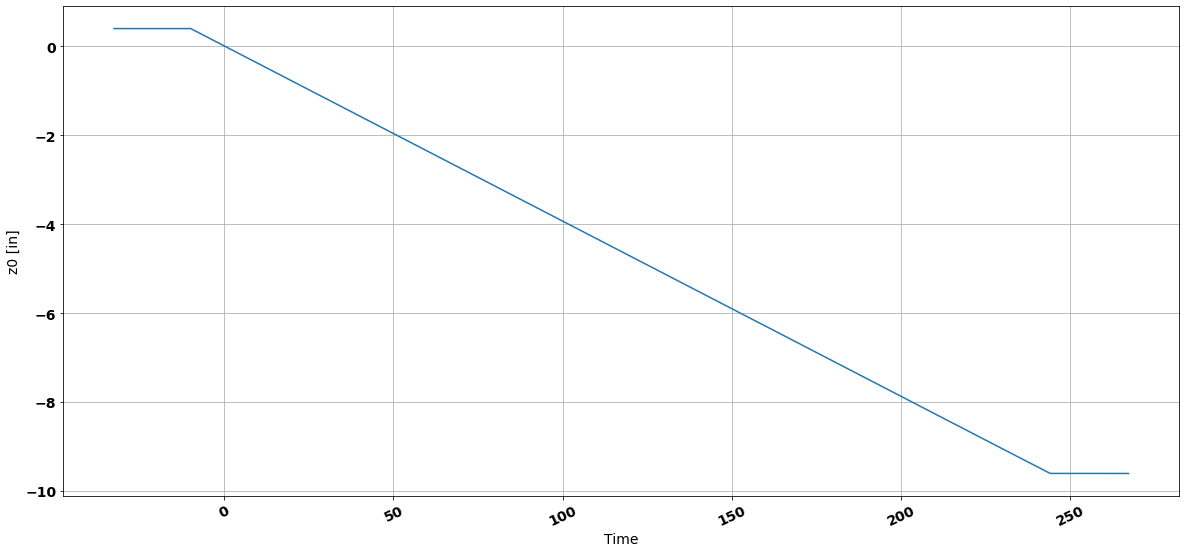

In [119]:
plt.figure(figsize=[20, 10])
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
t_rel =  df1["time_s"] -  min(df1["time_s"])

plt.plot(t_rel-32.6, df1["pos_0_m"]*100/2.54)

#plt.plot(dates1, df1["pos_1_m"])
plt.xlabel("Time")
plt.ylabel("z0 [in]")
plt.grid('on')
#plt.ylim([-2, 0])
#plt.xlim([0, 51])

plt.show()

In [19]:
df_wob

,time_s,wob_n,Unnamed: 2
4915,1.632000e+09,-65.182771,NaN
4916,1.632000e+09,-62.396157,NaN
4917,1.632000e+09,-61.678107,NaN
4918,1.632000e+09,-63.888430,NaN
4919,1.632000e+09,-63.522440,NaN
...,...,...,...
7903,1.632001e+09,-94.050104,NaN
7904,1.632001e+09,-95.164383,NaN
7905,1.632001e+09,-96.700365,NaN
7906,1.632001e+09,-95.730685,NaN
